<img src="https://www.arm.gov/uploads/53943128233_e595b5afeb_c.jpg" style="height: 300px;" alt="BNF Instruments"></img>

# Aerosol Optical Properties at BNF

## Imports

In [2]:
import act
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Access Aerosol Property Data at BNF
Use the ACT library to search and download data at BNF

In [3]:
# Set your username and token
username = 'mgrover4'
token = '176e1559b67be630'

# Set the datastream and start/enddates
datastream = 'bnfaoscaps3wM1.b1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_caps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaossmpsM1.b1'
result_smps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaosnephdryM1.b1'
result_neph = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaoppsap1flynn1mM1.c1'
result_psap = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaossp2xrM1.b1'
result_sp2 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)


[DOWNLOADING] bnfaoscaps3wM1.b1.20250508.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250509.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250510.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250511.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Sedlacek, A., & Smith, S. Cavity Attenuated Phase Shift Extinction
Monitor (AOSCAPS3W), 2025-05-08 to 2025-05-11, Bankhead National Forest, AL,
USA; Long-term Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main
Site) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1406888

[DOWNLOADING] bnfaossmpsM1.b1.20250508.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250509.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250510.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250511.000459.nc

If you use these data to prepare a publication, please cite:

Kuang, C., Singh, A., Howie, J., Salwen, C., & Hayes, C. Scanning mobility
particle sizer (AOSSMPS), 2025-05-08 to 2025-05-11, Bankhead Nat

### Load the Data into ACT and Apply Quality Control
Let's read in the data using ACT and check out the data

In [4]:
ds_caps_org = act.io.read_arm_netcdf(result_caps)
ds_smps_org = act.io.read_arm_netcdf(result_smps)
ds_neph_org = act.io.read_arm_netcdf(result_neph)
ds_sp2_org = act.io.read_arm_netcdf(result_sp2)
ds_psap_org = act.io.read_arm_netcdf(result_psap)

#### Visualize the Data without Quality Control

(0.0, 300.0)

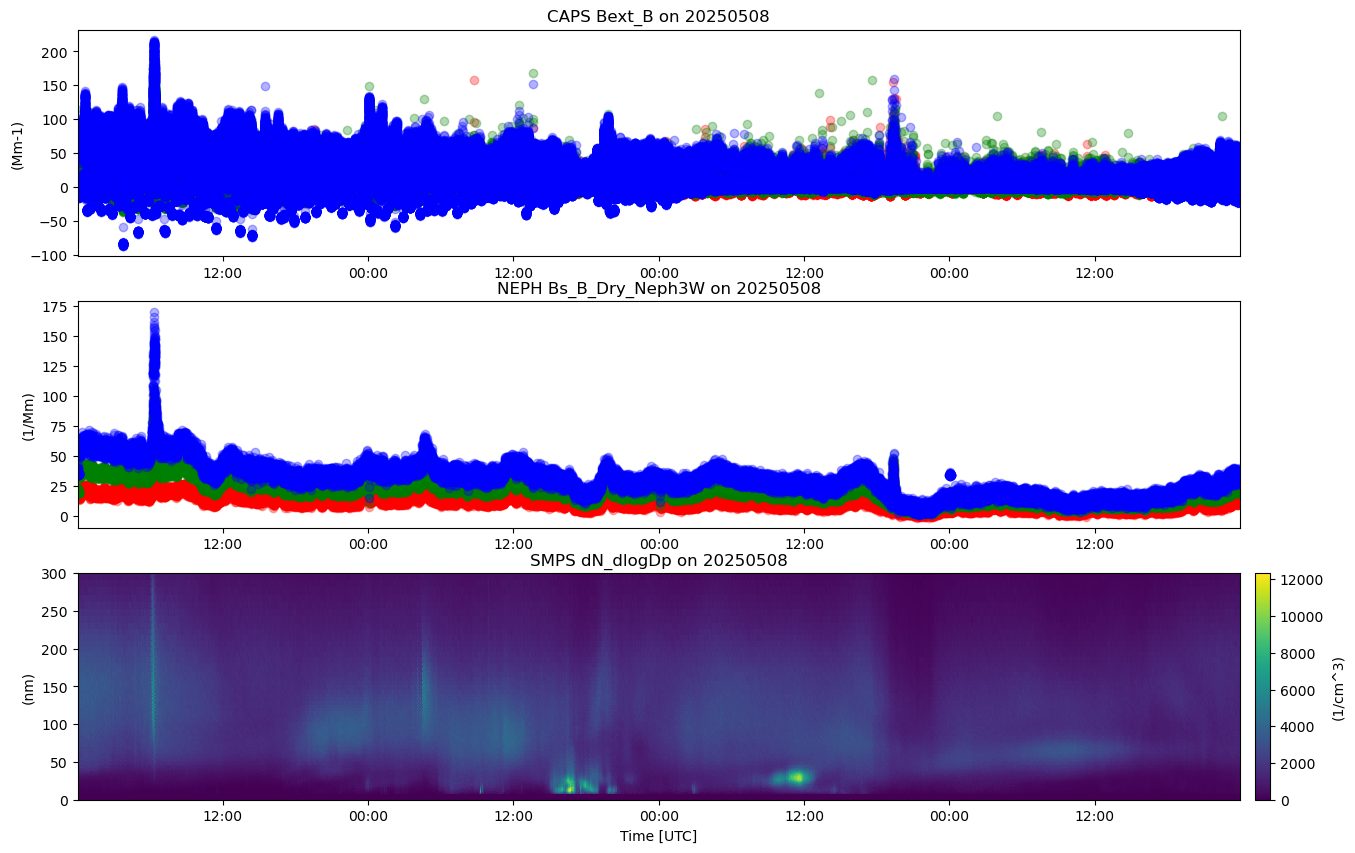

In [5]:
display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps_org, 'NEPH':ds_neph_org,'SMPS': ds_smps_org }, figsize=(15, 10), subplot_shape=(3,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=0.3)


display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=0.3)

# Plot up the MET btemperature and precipitation
display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(2,))
display.axes[2,].set_ylim(0, 300)

We can see that there's some missing data in the plot above so let's take a look at the embedded QC!

First, for many of the ACT QC features, we need to get the dataset more to CF standard and that involves cleaning up some of the attributes and ways that ARM has historically handled QC

In [6]:
ds_caps_org.clean.cleanup()
ds_smps_org.clean.cleanup()
ds_neph_org.clean.cleanup()
ds_sp2_org.clean.cleanup()
ds_psap_org.clean.cleanup()

ds_caps_org = ds_caps_org.load().where(ds_caps_org.impactor_state == 1, drop=True)
ds_neph_org = ds_neph_org.load().where(ds_neph_org.impactor_state == 1, drop=True)
ds_psap_org = ds_psap_org.load().where(ds_psap_org.impactor_state == 1, drop=True)

ds_psap_org

<xarray.Dataset> Size: 2MB
Dimensions:                         (time: 2777, bound: 2)
Coordinates:
  * time                            (time) datetime64[ns] 22kB 2025-05-08T00:...
Dimensions without coordinates: bound
Data variables: (12/132)
    base_time                       (time) datetime64[ns] 22kB 2025-05-08 ......
    time_offset                     (time) datetime64[ns] 22kB 2025-05-08T00:...
    time_bounds                     (time, bound) object 44kB 2025-05-08 00:0...
    impactor_state                  (time) float64 22kB 1.0 1.0 1.0 ... 1.0 1.0
    Bs_B                            (time) float32 11kB nan 52.82 ... 29.16
    qc_Bs_B                         (time) float64 22kB 9.0 16.0 0.0 ... 0.0 0.0
    ...                              ...
    K1_B                            (time) float32 11kB 0.02 0.02 ... 0.02 0.02
    K1_G                            (time) float32 11kB 0.02 0.02 ... 0.02 0.02
    K1_R                            (time) float32 11kB 0.02 0.02 ... 0.02 0.02
    lat                             (time) float32 11kB 34.34 34.34 ... 34.34
    lon                             (time) float32 11kB -87.34 -87.34 ... -87.34
    alt                             (time) float32 11kB 293.0 293.0 ... 293.0
Attributes: (12/20)
    command_line:                    aosaop -n aosaoppsap -s bnf -f M1 -b 202...
    Conventions:                     ARM-1.2
    process_version:                 vap-aosaop-1.5-1.el7
    dod_version:                     aoppsap1flynn1m-c1-1.4
    input_datastreams:               bnfaosnephdry1mM1.b1 : 1.1 : 20250508.00...
    site_id:                         bnf
    ...                              ...
    doi:                             10.5439/1369240
    history:                         created by user dsmgr on machine prod-pr...
    _file_dates:                     ['20250508', '20250509', '20250510', '20...
    _file_times:                     ['000030', '000030', '000030', '000030']
    _datastream:                     bnfaoppsap1flynn1mM1.c1
    _arm_standards_flag:             1

### Resample to Equivalent Hourly Frequency
And plot again!

Create a plotting display object with 2 plots.

Note we have to create a dictionary of datasets to pass in.

In [7]:
ds_caps=ds_caps_org.resample(time='60min').mean()
ds_neph=ds_neph_org.resample(time='60min').mean()
ds_psap=ds_psap_org.resample(time='60min').mean()
ds_sp2=ds_sp2_org.resample(time='60min').mean()
ds_smps=ds_smps_org.resample(time="60min").mean()

(0.0, 300.0)

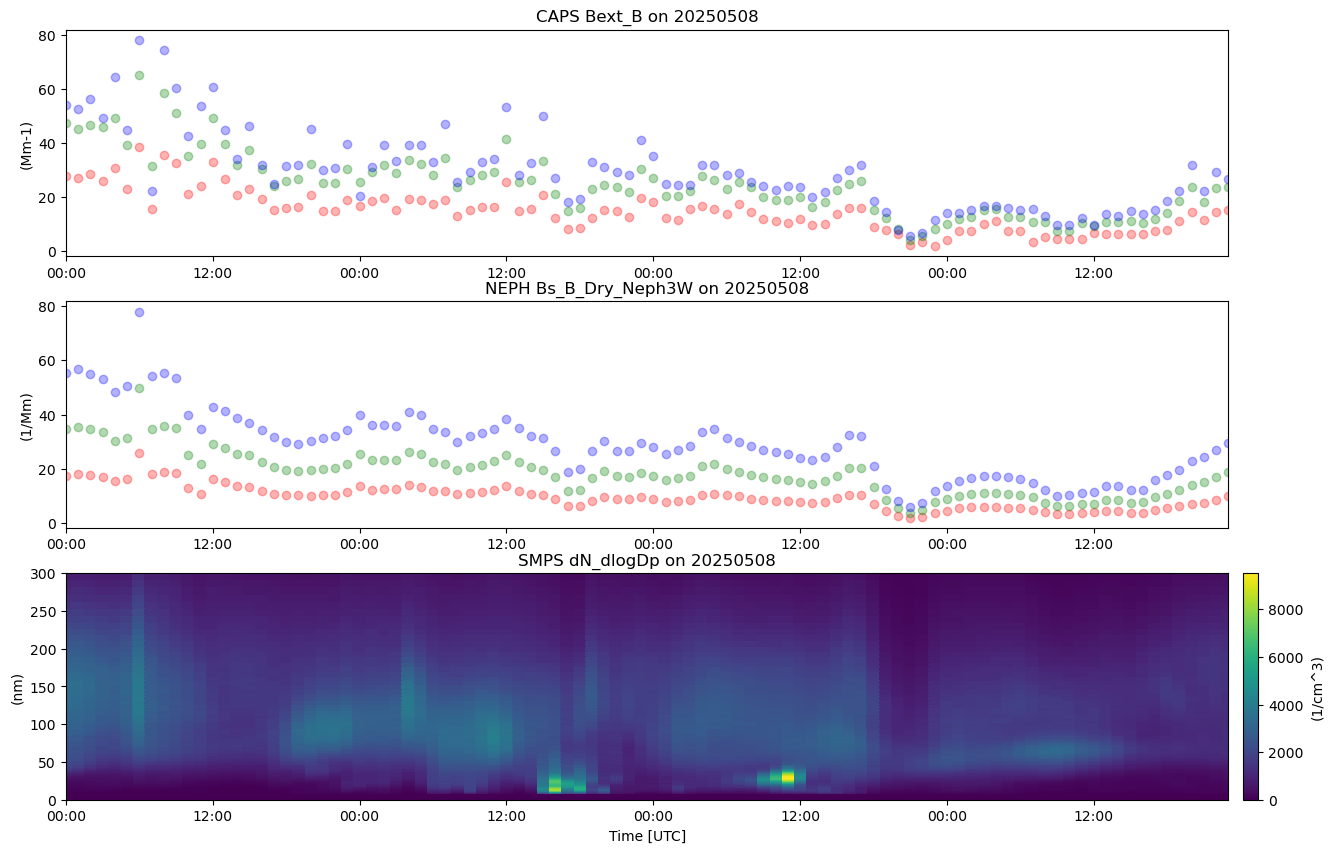

In [8]:
display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SMPS': ds_smps }, figsize=(15, 10), subplot_shape=(3,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=0.3)


display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=0.3)

# Plot up the MET btemperature and precipitation
display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(2,))
display.axes[2,].set_ylim(0, 300)

## Create a Scatter Plot Comparison of Values

In [9]:
dfNeph=ds_neph.to_dataframe()
dfCaps=ds_caps.to_dataframe()
dfPsap=ds_psap.to_dataframe()
dfSp2=ds_sp2.to_dataframe()

In [10]:
df_merged = pd.merge_asof(dfCaps, dfPsap,on='time', direction='nearest')

df_merged['SSA B']=df_merged['Bs_B_Dry_Neph3W']/df_merged['Bext_B']
df_merged['SSA R']=df_merged['Bs_R_Dry_Neph3W']/df_merged['Bext_R']
df_merged['SSA G']=df_merged['Bs_G_Dry_Neph3W']/df_merged['Bext_G']

df_merged['alphaRB']=-(np.log (df_merged['Bs_R_Dry_Neph3W']/df_merged['Bs_B_Dry_Neph3W'])/np.log (700/450))
df_merged['alphaBG']=-(np.log (df_merged['Bs_B_Dry_Neph3W']/df_merged['Bs_G_Dry_Neph3W'])/np.log (450/550))
df_merged['alphaGR']=-(np.log (df_merged['Bs_G_Dry_Neph3W']/df_merged['Bs_R_Dry_Neph3W'])/np.log (550/700))

df_merged['Abs_B']=df_merged['Bext_B']-df_merged['Bs_B_Dry_Neph3W']
df_merged['Abs_R']=df_merged['Bext_R']-df_merged['Bs_R_Dry_Neph3W']
df_merged['Abs_G']=df_merged['Bext_G']-df_merged['Bs_G_Dry_Neph3W']

df_merged['AAE_RB']=-(np.log (df_merged['Abs_R']/df_merged['Abs_B'])/np.log (700/450))
df_merged['AAE_BG']=-(np.log (df_merged['Abs_B']/df_merged['Abs_G'])/np.log (450/550))
df_merged['AAE_GR']=-(np.log (df_merged['Abs_G']/df_merged['Abs_R'])/np.log (550/700))

df_merged['Avg_SAE']=(df_merged['alphaRB']+df_merged['alphaBG']+df_merged['alphaGR'])/3
df_merged['Avg_SSA']=(df_merged['SSA B']+df_merged['SSA R']+df_merged['SSA G'])/3

/Users/mgrover/mambaforge/envs/arm-field-site-cookbook-dev/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mgrover/mambaforge/envs/arm-field-site-cookbook-dev/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Mobility diameter (nm) dN/dlogDp')

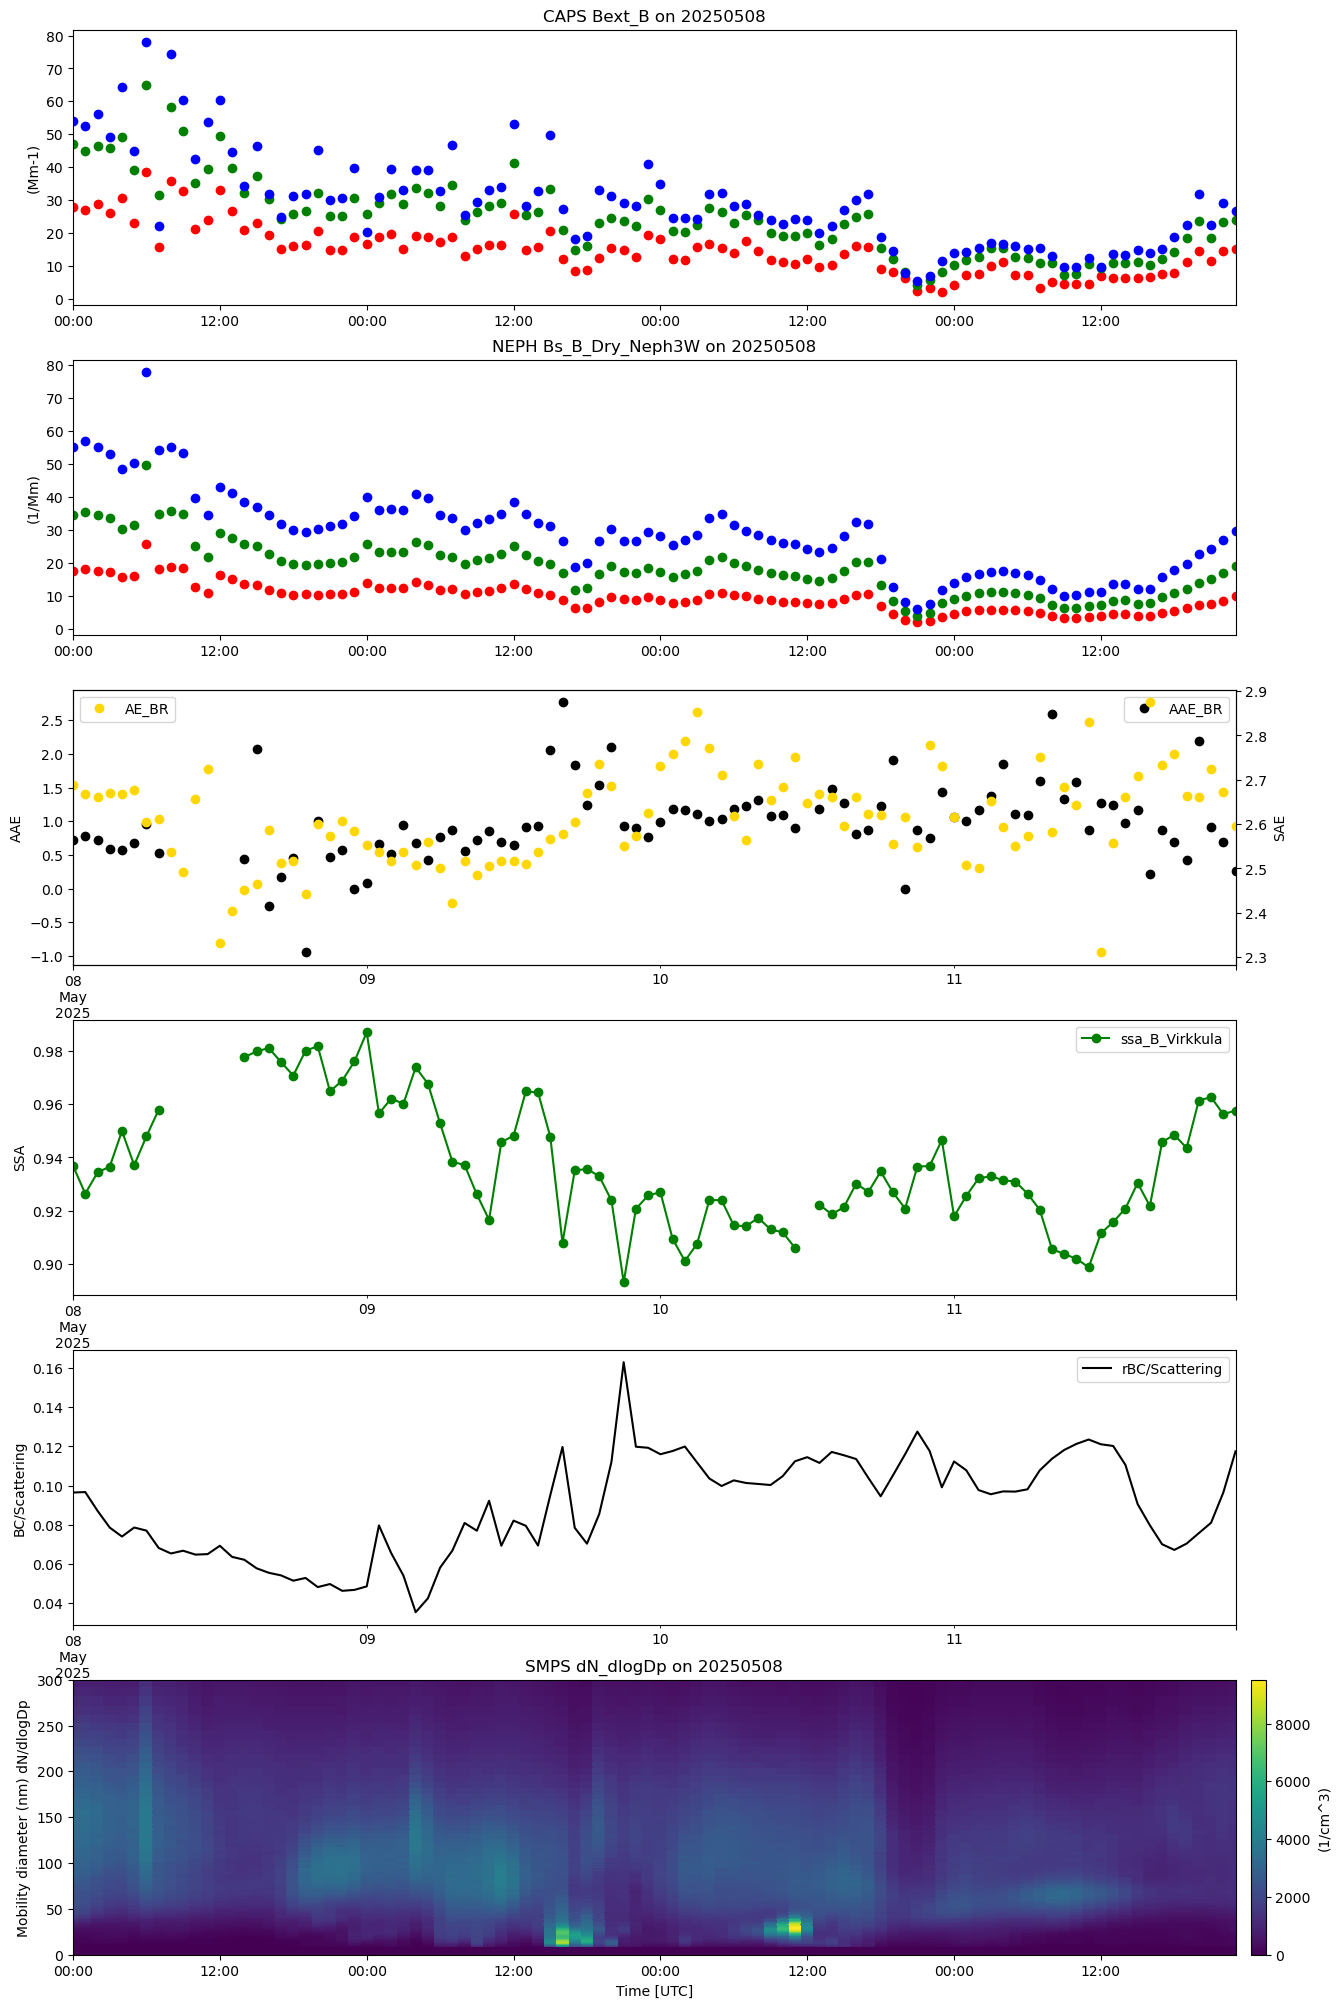

In [11]:
display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SMPS': ds_smps }, figsize=(15, 25), subplot_shape=(6,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=1)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=1)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=1)

display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=1)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=1)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=1)

#display.axes[2,].plot(df_merged['time'],df_merged['SSA R'], color='red',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA G'],color='green',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA B'],color='blue',marker='o', linestyle='none',alpha=0.3)

#df_merged.plot(x='time',y='SSA R',ax=display.axes[2,],color='red',style='o')
##df_merged.plot(x='time',y='SSA B',ax=display.axes[2,],color='blue',style='o')
#df_merged.plot(x='time',y='SSA G',ax=display.axes[2,],color='green',style='o')


#display.axes[2,].set_ylabel('SSA')
#display.axes[2,].set_ylim(0.25, 1.5)


df_merged.plot(x='time',y='AAE_BR',ax=display.axes[2,],color='black',style='o')


display.axes[2,].set_ylabel('AAE')
twinx=display.axes[2,].twinx()
twinx.set_ylabel('SAE')
df_merged.plot(x='time',y='AE_BR',ax=twinx,color='gold',style='o')
#twinx.set_ylim(1.5, 3)



#df_merged.plot(x='time',y='AAE_RB',ax=display.axes[4,],color='red',style='o')
##df_merged.plot(x='time',y='AAE_BG',ax=display.axes[4,],color='blue',style='o')
#df_merged.plot(x='time',y='AAE_GR',ax=display.axes[4,],color='green',style='o')
#display.axes[4,].set_ylabel('AAE')
#display.axes[4,].set_ylim(0, 2)

df_merged.plot(x='time',y='ssa_B_Virkkula',ax=display.axes[3,],color='green',style='-o')
display.axes[3,].set_ylabel('SSA')

#display.axes[3,].set_ylim(0.6, 1)
#twin_ax.set_ylim(0, 1)
dfSp2 = pd.DataFrame({'time': ds_sp2['time'].values, 'rBC_particle_conc': ds_sp2['rBC_particle_conc'].values, 'scattering_particle_conc': ds_sp2['scattering_particle_conc'].values})
dfSp2['rBC/Scattering']=dfSp2['rBC_particle_conc']/dfSp2['scattering_particle_conc']


dfSp2.plot(x='time',y='rBC/Scattering', color='black', ax=display.axes[4,])
display.axes[4,].set_ylabel('BC/Scattering')


display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(5,))
display.axes[5,].set_ylim(0, 300)
display.axes[5,].set_ylabel('Mobility diameter (nm) dN/dlogDp')